# Diabetes Prediction
## Bệnh tiểu đường
Bệnh đái tháo đường (hay còn gọi là bệnh tiểu đường) là một tình trạng bệnh lý rối loạn chuyển hóa không đồng nhất, có đặc điểm tăng lượng đường huyết trong cơ thể. Nguyên nhân thường là do nồng độ insulin trong cơ thể không ổn định ( có thể thiếu thậm chí thừa). Nếu bị đái tháo đường mà bạn kiểm soát được lượng đường trong máu và thường xuyên theo dõi tốt thì chắc chắn lượng đường nằm trong mức an toàn gần như người bình thường.

## Mục tiêu

- Phân loại bệnh nhân có mắc tiểu đường hay không.
- Dữ liệu gồm các biến là dữ liệu y tế đo được từ bệnh nhân và biến kết quả.

## Giải thích các đặc trưng

- Pregnancies :- Số lần mang thai
- Glucose :- Glucose huyết tương ở thời điểm sau 2 giờ làm nghiệm pháp dung nạp glucose đường uống
- BloodPressure :- Huyết áp tâm trương (mm hg)
- SkinThickness :- độ dày nếp gấp da cơ tam đầu (mm)
- Insulin :- 2 hour serum insulin(mu U/ml)
- BMI :- Body Mass Index Chỉ số khối cơ thể (cân nặng)/(chiều cao^2)
- Age :- tuổi
- DiabetesPedigreeFunction :- chỉ số thể hiện khả năng mắc bệnh tiểu đường dựa trên tiền sử gia đình
- Outcome :- 0(không bị tiểu đường) or 1 (bị tiểu đường)

# 1. Loading the dataset 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("diabetes.csv")


# 2. Exploratory Data Analysis
## a. Understanding the dataset

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape 

(768, 9)

In [4]:
df.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe() 
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### **Nhận xét** :- Quan sát thấy rằng giá trị min của một số cột là 0, nhưng trong thực tế dữ liệu y tế không thể mang giá trị 0 được. Do đó, trong quá trình làm sạch dữ liệu, chúng ta sẽ phải thay thế chúng bằng giá trị median/mean tùy thuộc vào phân phối. Bên cạnh đó ta cũng thấy rằng giá trị max của cột insulin là 846, trong khi giá trị mean là 79.79, nên ta cũng cần phải xử lý ngoại lệ.

## b. Data Cleaning
- Loại bỏ các hàng bị trùng lặp
- Kiểm tra giá trị NULL
- Kiểm tra giá trị bằng 0 và thay thế nó: - Trong y tế, một số dữ liệu không thể có giá trị 0 như Huyết áp hoặc Mức Glucose. Do đó cần phải thay thế chúng bằng giá trị trung bình của cột cụ thể đó.


In [8]:
df=df.drop_duplicates()

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
#checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed in df.describe
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [11]:
#replacing 0 values with median of that column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

# 4. Data Visualization

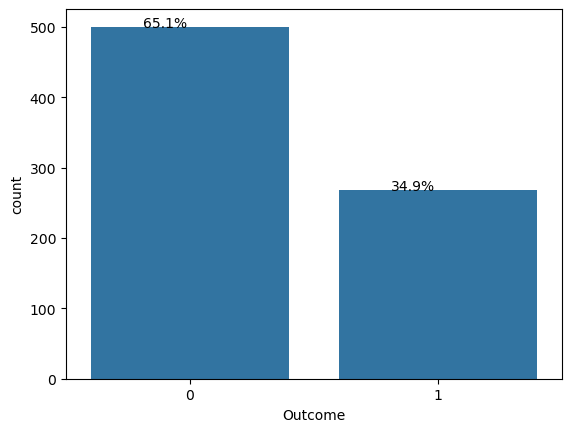

In [12]:
ax=sns.countplot(x='Outcome',data=df)
total = len(df['Outcome'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

# Hiển thị biểu đồ
plt.show()

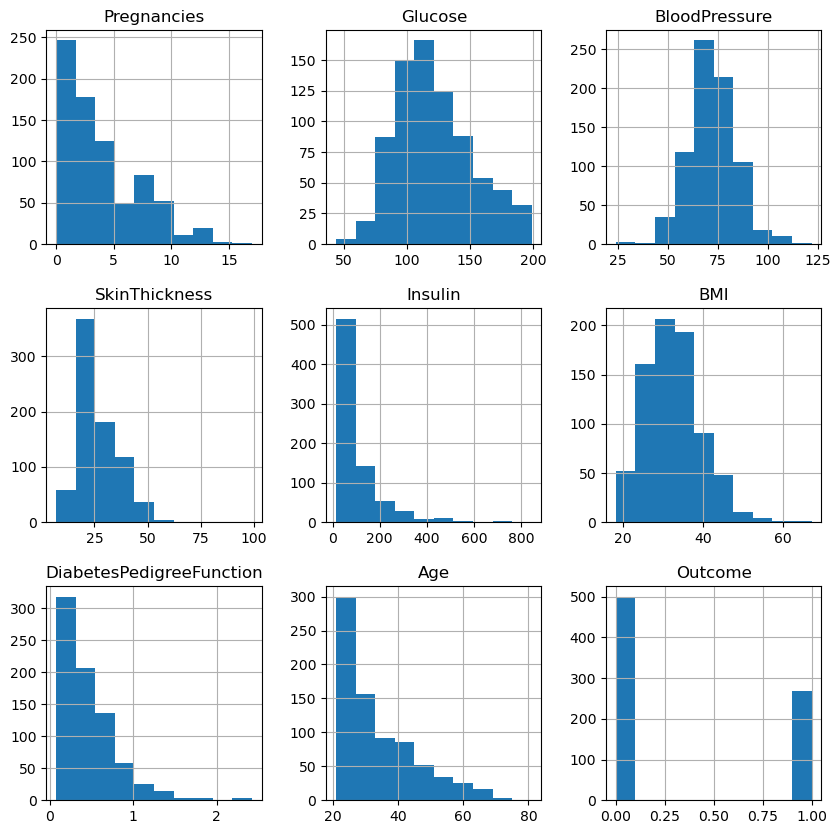

In [13]:
#histogram for each  feature
df.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: xlabel='DiabetesPedigreeFunction'>

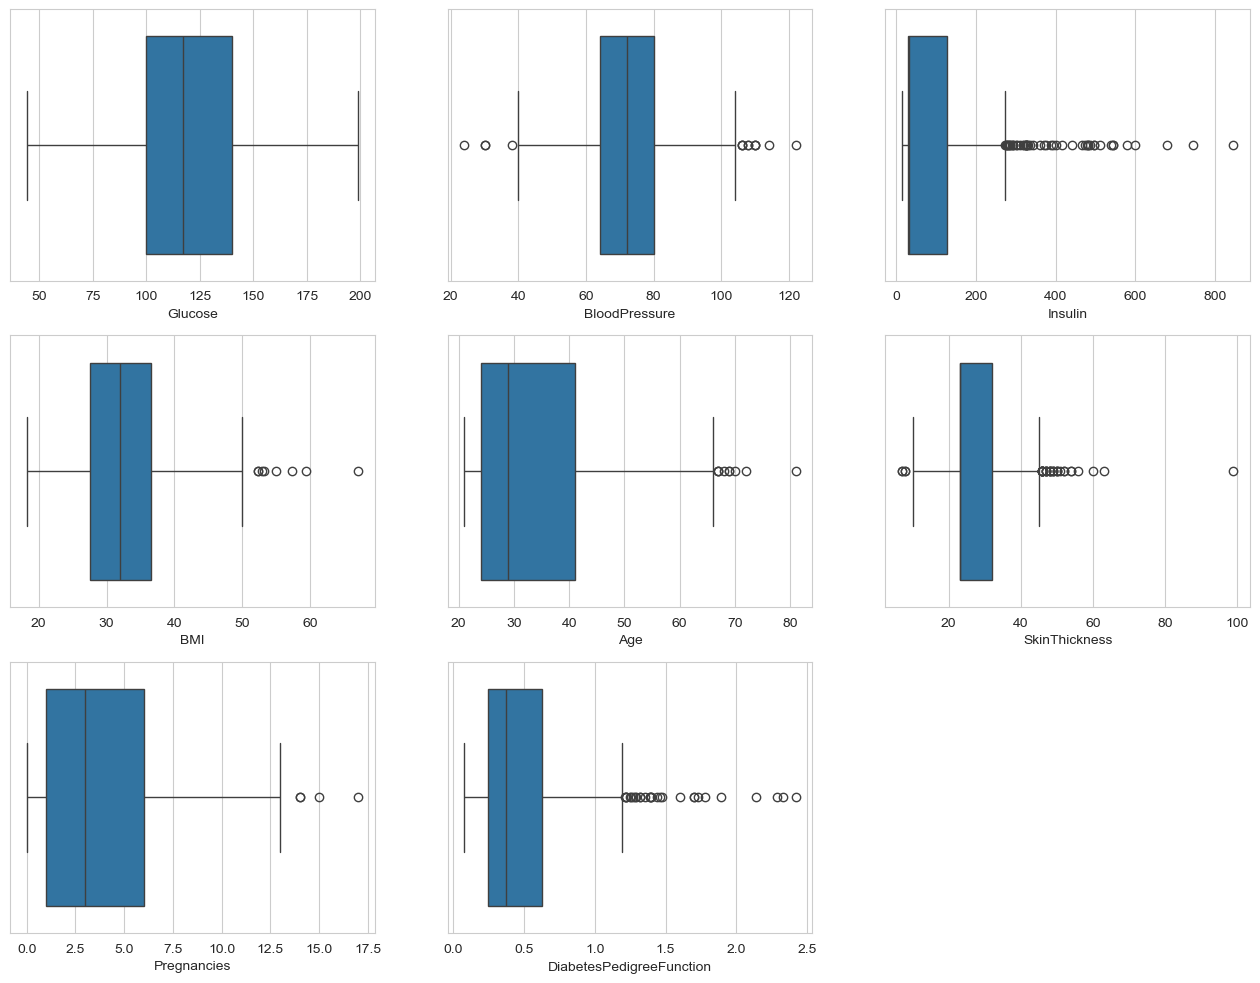

In [14]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

Các ngoại lệ (Outliers) có thể làm sai lệch các phân tích về dữ liệu vì vậy ta cần phải xử lý chúng. Trong trường hợp này, việc loại bỏ các giá trị ngoại lệ có thể gây mất mát cho dữ liệu, vì vậy ta phải xử lý vấn đề này bằng các kỹ thuật chuyển đổi và chia tỷ lệ khác nhau.

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

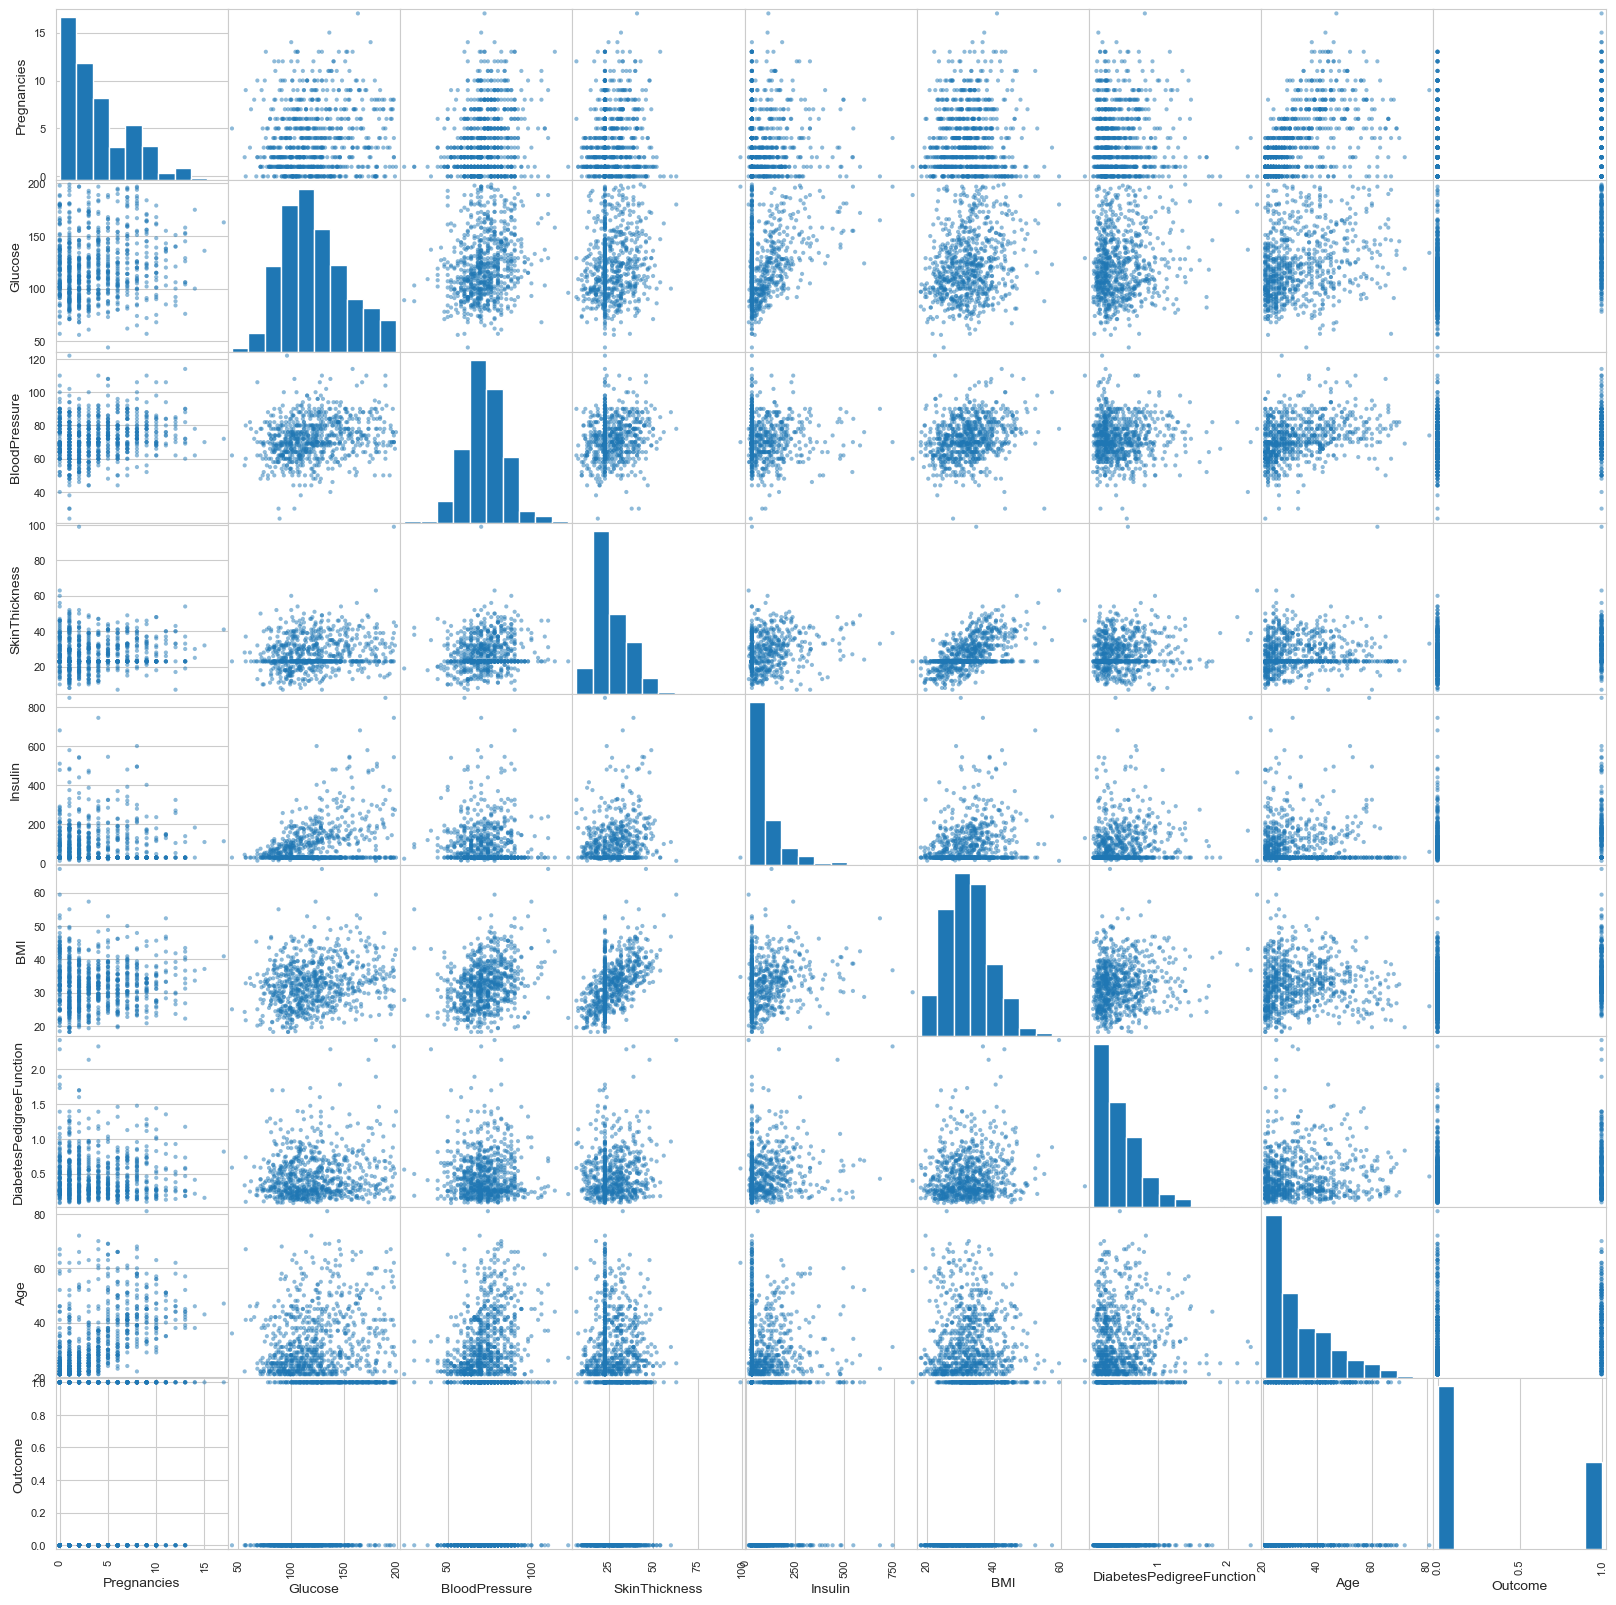

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20))

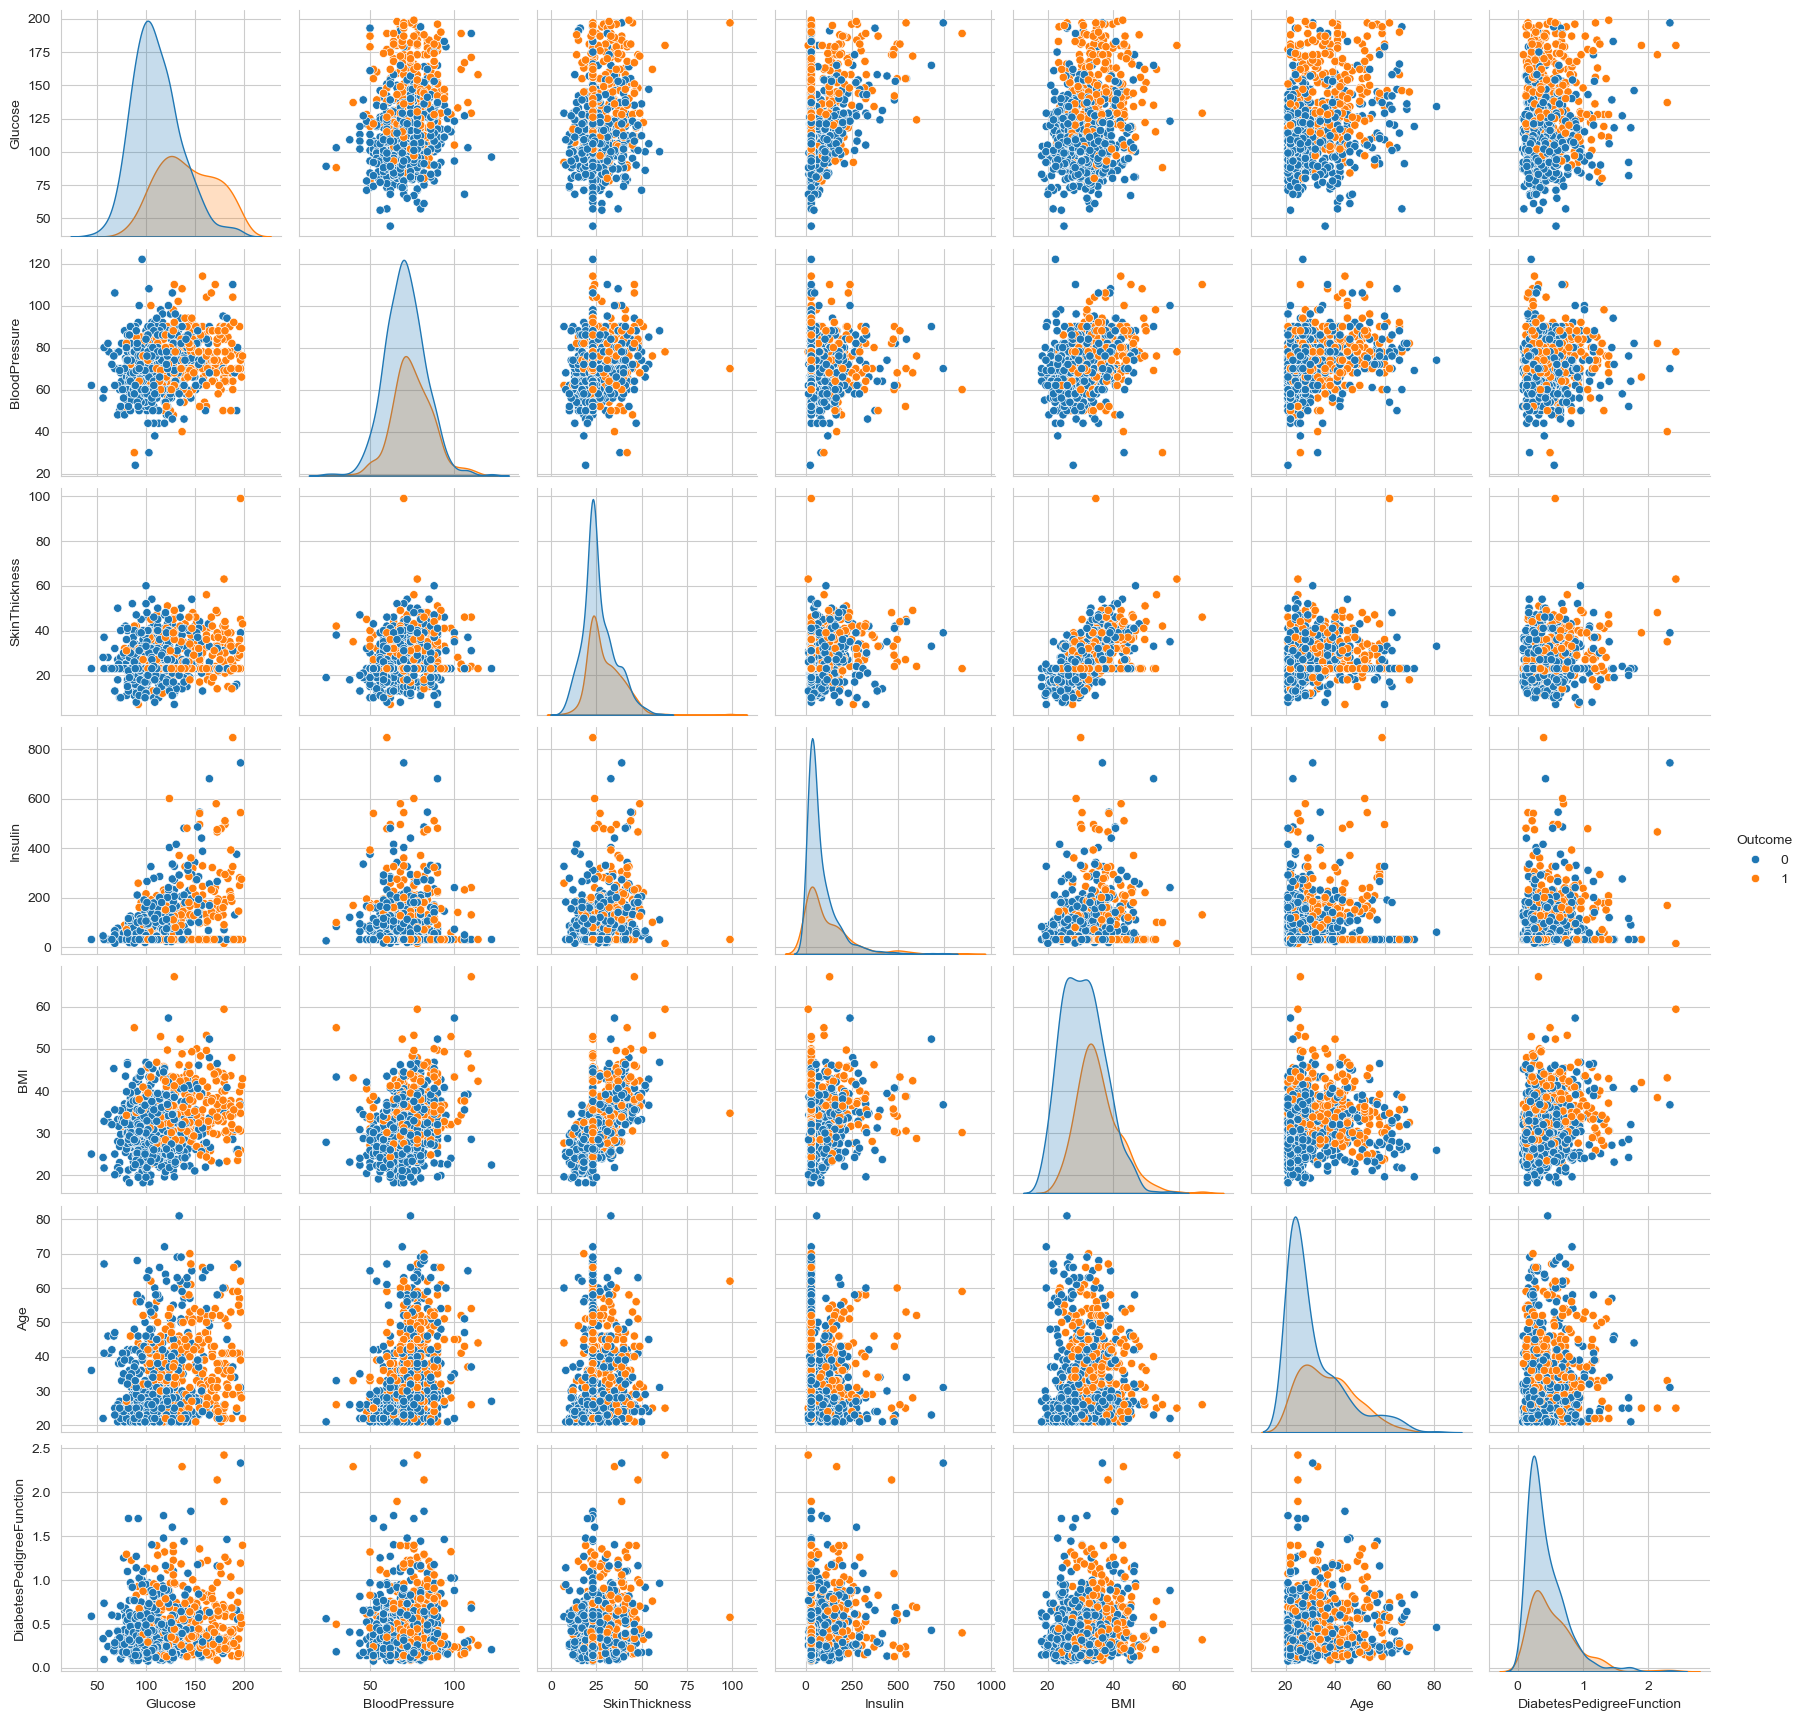

In [16]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Outcome']

# Vẽ pairplot
sns.pairplot(df[columns], hue='Outcome')
plt.show()

# 5. Feature Selection

<Axes: >

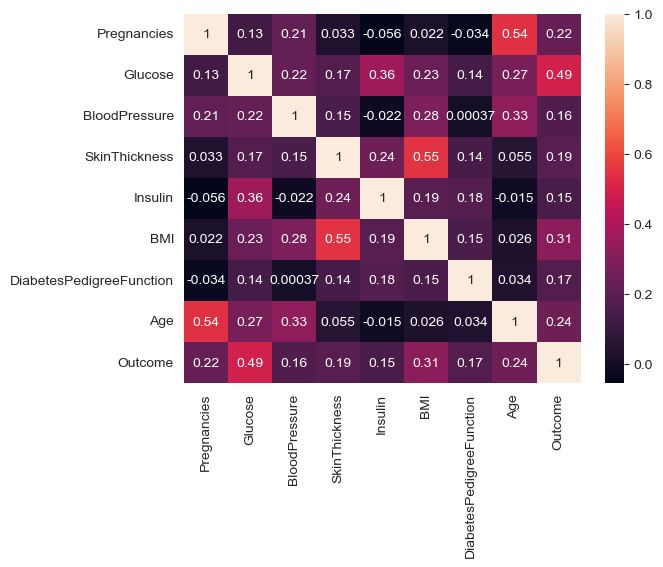

In [17]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

 Glucose, BMI and Age are có tương quan nhất với Outcome. BloodPressure, Insulin, DiabetesPedigreeFunction có ít tương quan nhất.

In [18]:
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

# 6. Handling Outliers 

In [19]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


<Axes: xlabel='SkinThickness'>

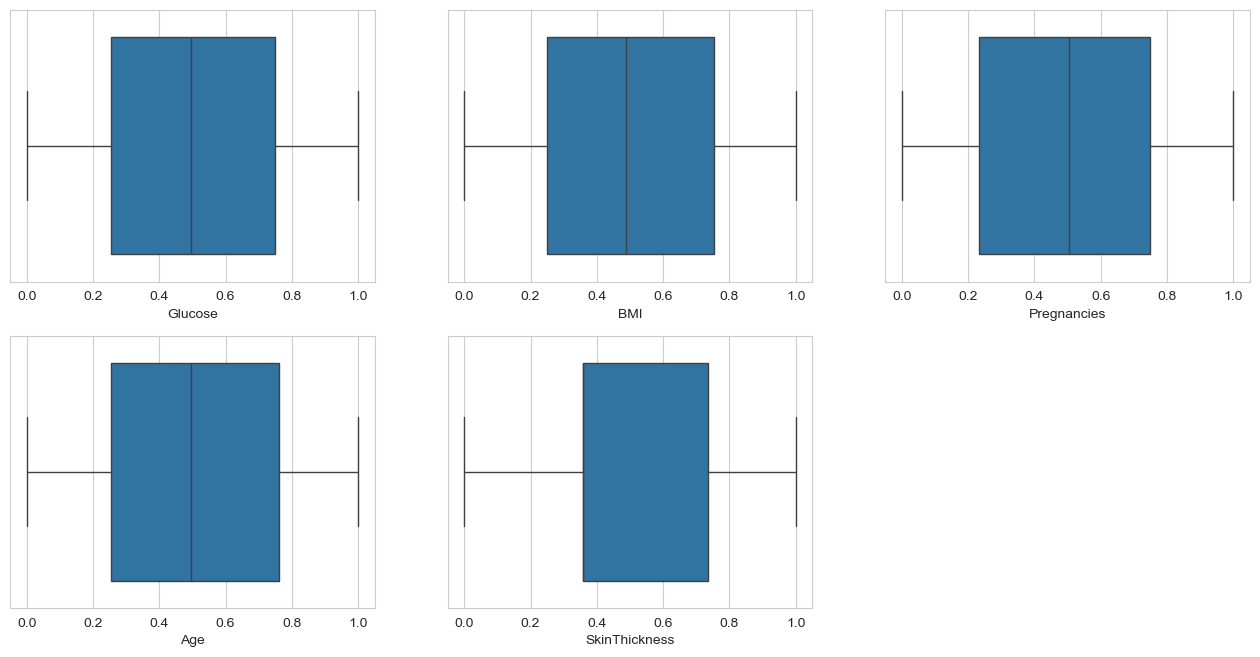

In [20]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)

# 7. Split the Data Frame into X and y

In [21]:
target_name='Outcome'
y= df_new[target_name]
X=df_new.drop(target_name,axis=1)

In [22]:
X.head() 

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


In [23]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

# 8. TRAIN TEST SPLIT

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
X_train.shape,y_train.shape

((614, 5), (614,))

In [26]:
X_test.shape,y_test.shape

((154, 5), (154,))

# 9. TRAINING MODEL
Chọn độ đo F1 để đánh giá mô hình


In [27]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-3, num=200)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, scoring='f1', n_jobs=-1, cv=10)

In [29]:
best_model= nbModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


In [30]:
nb_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.84      0.81      0.83       107
         1.0       0.61      0.66      0.63        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.77      0.77      0.77       154


 F1:
 0.6326530612244897

 Precision score is:
 0.6078431372549019

 Recall score is:
 0.6595744680851063

 Accuracy:
 0.7662337662337663

 Confusion Matrix:



<Axes: >

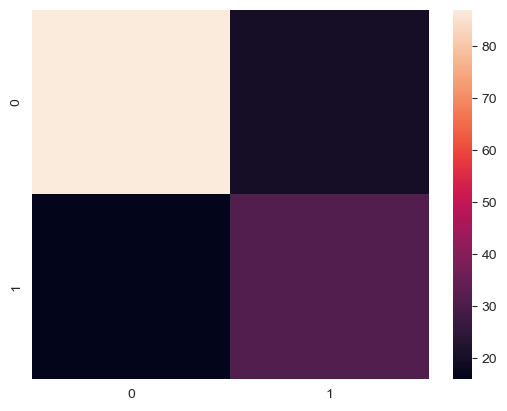

In [31]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))
print("\n Accuracy:\n",accuracy_score(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred))

# 10. Save model

In [32]:
import pickle

filename = 'diabetes_model.sav'
pickle.dump(best_model, open(filename, 'wb'))